In [1]:
from helpers import *
import shap

In [2]:
goi_id = getGOI()

goi_pat_log, X_log, y_log, X_log_train, X_log_test, y_log_train, y_log_test = getProcessedData(goi_id)

X_corr, X_train_corr, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

In [3]:
xgb_t20_corr_file = open("../models/XGB_TOP20_CORR_PARAMS", 'rb')
xgb_t20_corr = pickle.load(xgb_t20_corr_file)
xgb_t20_corr_file.close()

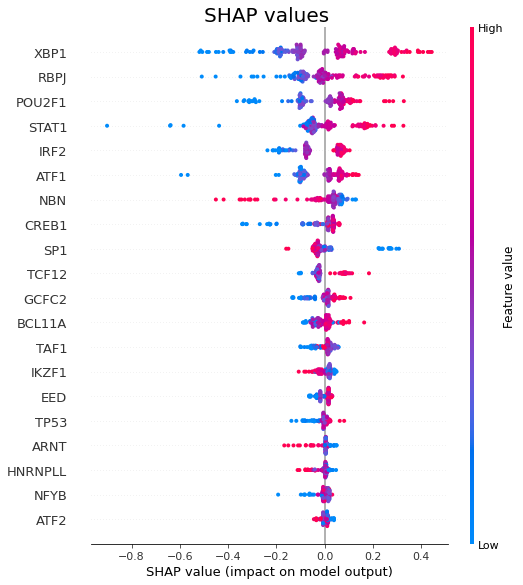

In [4]:
# !# Create object that can calculate shap values
explainer = shap.Explainer(xgb_t20_corr)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer(X_test_corr)

shap.plots.beeswarm(shap_values, max_display = 20, show = False)
plt.title('SHAP values ', size = 20)
# plt.savefig('test')

In [5]:
help(shap.plots.beeswarm)

Help on function beeswarm in module shap.plots._beeswarm:

beeswarm(shap_values, max_display=10, order=shap.Explanation.abs.mean(0), clustering=None, cluster_threshold=0.5, color=None, axis_color='#333333', alpha=1, show=True, log_scale=False, color_bar=True, plot_size='auto', color_bar_label='Feature value')
    Create a SHAP beeswarm plot, colored by feature values when they are provided.
    
    Parameters
    ----------
    shap_values : Explanation
        This is an Explanation object containing a matrix of SHAP values (# samples x # features).
    
    max_display : int
        How many top features to include in the plot (default is 20, or 7 for interaction plots)
    
    plot_size : "auto" (default), float, (float, float), or None
        What size to make the plot. By default the size is auto-scaled based on the number of
        features that are being displayed. Passing a single float will cause each row to be that 
        many inches high. Passing a pair of floats will 

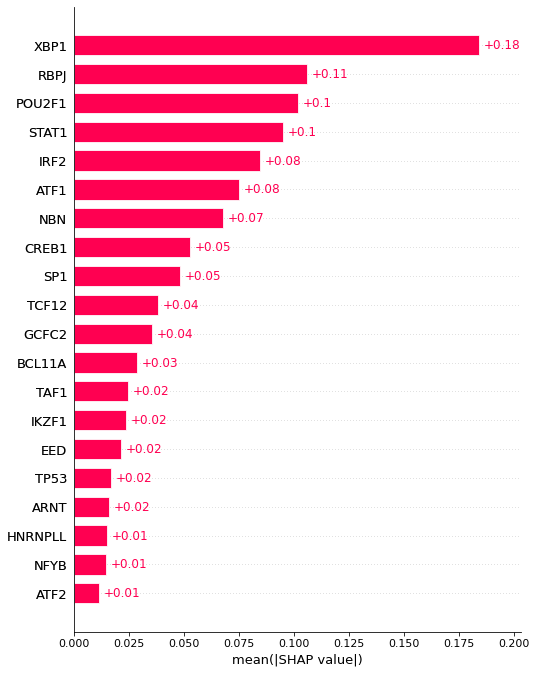

In [6]:
shap.plots.bar(shap_values, max_display = 20)

In [7]:
import os

os.listdir('../models/')
os.fsdecode(os.listdir('../models/')[0])
file = open(os.path.join('../models/', os.fsdecode(os.listdir('../models/')[0])), 'rb')
xgb = pickle.load(file)
file.close()

# directory = os.fsencode('../models/')
    
    
    
# for file in os.listdir('../models/'):
#     filename = os.fsdecode(file)
#     print(os.path.join('../models/', filename))
    
# #      if filename.endswith(".asm") or filename.endswith(".py"): 
# #          # print(os.path.join(directory, filename))
# #          continue
#      else:
#          continue

In [8]:
xgb_t20_corr

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5658140364286011,
             colsample_bynode=0.8078536842438382,
             colsample_bytree=0.7051418651679482, gamma=0.7909390660598336,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0968001207373439, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=183, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8963379482245502, tree_method='exact',
             validate_parameters=1, verbosity=None)